In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
%matplotlib inline

In [16]:
#Define domain and constants
nx = 41
ny = 41
nt = 1200
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))

#initial conditions

u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2



Text(0, 0.5, '$y$')

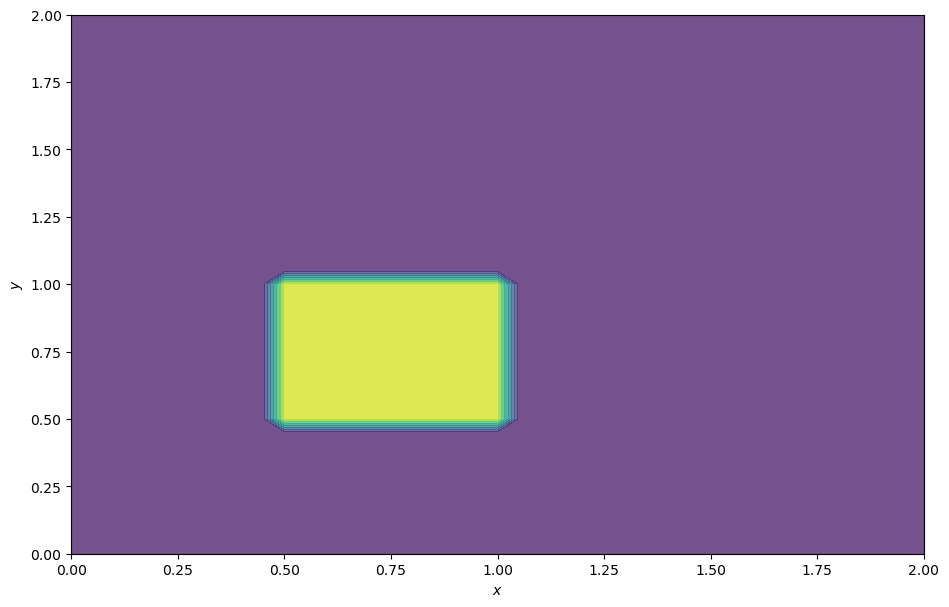

In [17]:
#plot ICs

fig, ax = plt.subplots(figsize=(11, 7), dpi=100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, u, alpha=0.5, cmap=cm.viridis)
plt.contourf(X, Y, v, alpha=0.5, cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [18]:

## ADVANCE SOLUTION IN TIME

zarrayu = np.zeros((ny, nx, nt))
zarrayv = np.zeros((ny, nx, nt))

    
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                        dt/dx*un[1:-1, 1:-1]*(un[1:-1, 1:-1]-un[1:-1, 0:-2]) -
                        dt/dy*vn[1:-1, 1:-1]*(un[1:-1, 1:-1]-un[0:-2, 1:-1]) +
                        nu*dt/dx**2*(un[1:-1, 2:] - 2*un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu*dt/dy**2*(un[2:, 1:-1] - 2*un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                        dt/dx*un[1:-1, 1:-1]*(vn[1:-1, 1:-1]-vn[1:-1, 0:-2]) -
                        dt/dy*vn[1:-1, 1:-1]*(vn[1:-1, 1:-1]-vn[0:-2, 1:-1]) +
                        nu*dt/dx**2*(vn[1:-1, 2:] - 2*vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        nu*dt/dy**2*(vn[2:, 1:-1] - 2*vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    
    zarrayu[:, :, n] = u.copy()
    zarrayv[:, :, n] = v.copy()
    
    


Text(0, 0.5, '$y$')

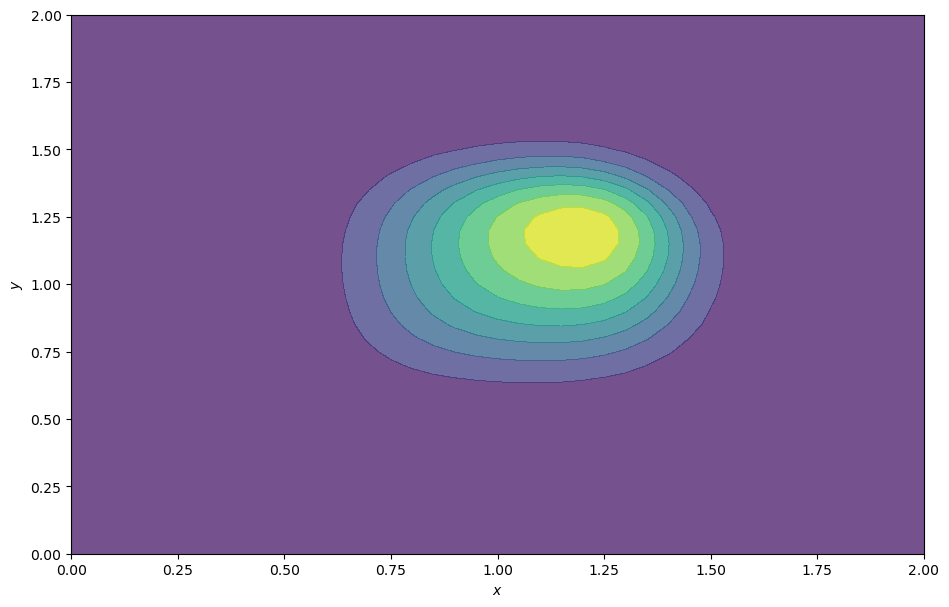

In [19]:
fig, ax = plt.subplots(figsize=(11, 7), dpi=100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, zarrayu[:, :, -1], alpha=0.5, cmap=cm.viridis)
plt.contourf(X, Y, zarrayv[:, :, -1], alpha=0.5, cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

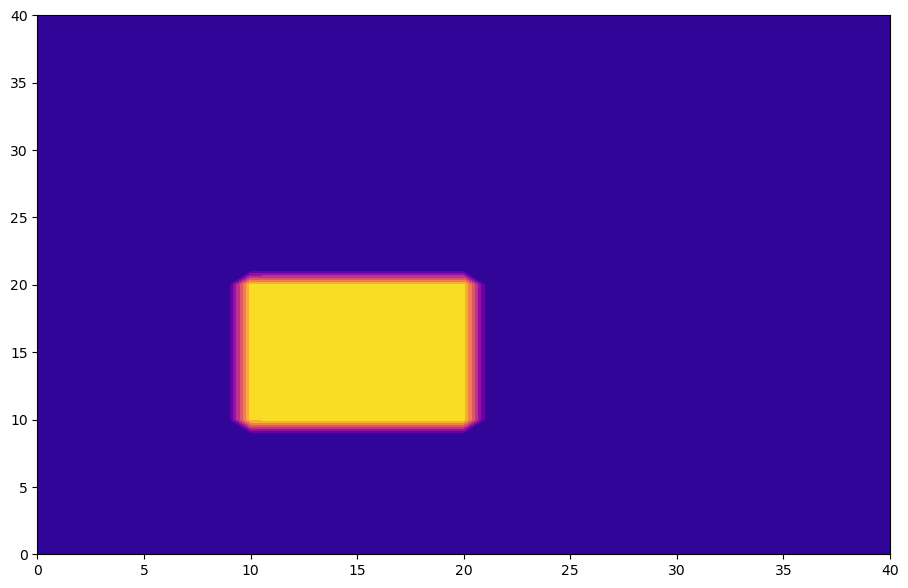

In [20]:
def update_plot(frame_number, zarray, plot):
    ax.clear()
    ax.contourf(zarray[:, :, frame_number], cmap='plasma')

fig, ax = plt.subplots(figsize=(11, 7), dpi=100)
X, Y = np.meshgrid(x, y)
ct = plt.contourf(X, Y, u, alpha=0.5, cmap=cm.viridis)
#plt.contourf(X, Y, v, alpha=0.5, cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ani = animation.FuncAnimation(
    fig, update_plot, nt, fargs=(zarrayu, ct), interval=1000 / 30
)

In [21]:
plt.rcParams['animation.html'] = 'html5'
ani


## Animation 3D - surface

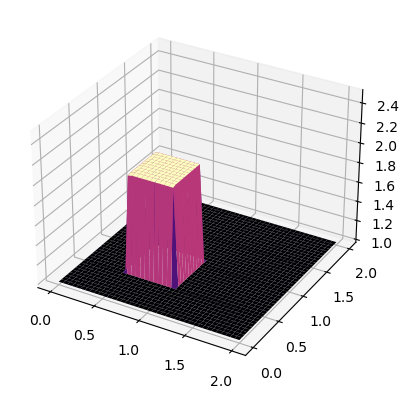

In [24]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:, :, frame_number], cmap="magma")

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_zlim(1, 2.5)
X, Y = np.meshgrid(x, y)
plot = [ax.plot_surface(X, Y, zarrayu[:, :, 0], color="0.75", rstride=1, cstride=1)]

ani = animation.FuncAnimation(
    fig, update_plot, nt, fargs=(zarrayu, plot), interval=1000 / 30
)

plt.rcParams['animation.html'] = 'html5'
ani
